# Visual Debugging

Sometimes it's hard to understand what's happening when working with PDFs. Natural PDF provides powerful visual debugging tools to help you see what you're extracting.

## Quick Visualization with `.show()`

The **fastest** way to see what you have selected is to call `.show()` on the element (or collection/region) that you receive.  
This simply returns a `PIL.Image` with highlights that you can display right away.

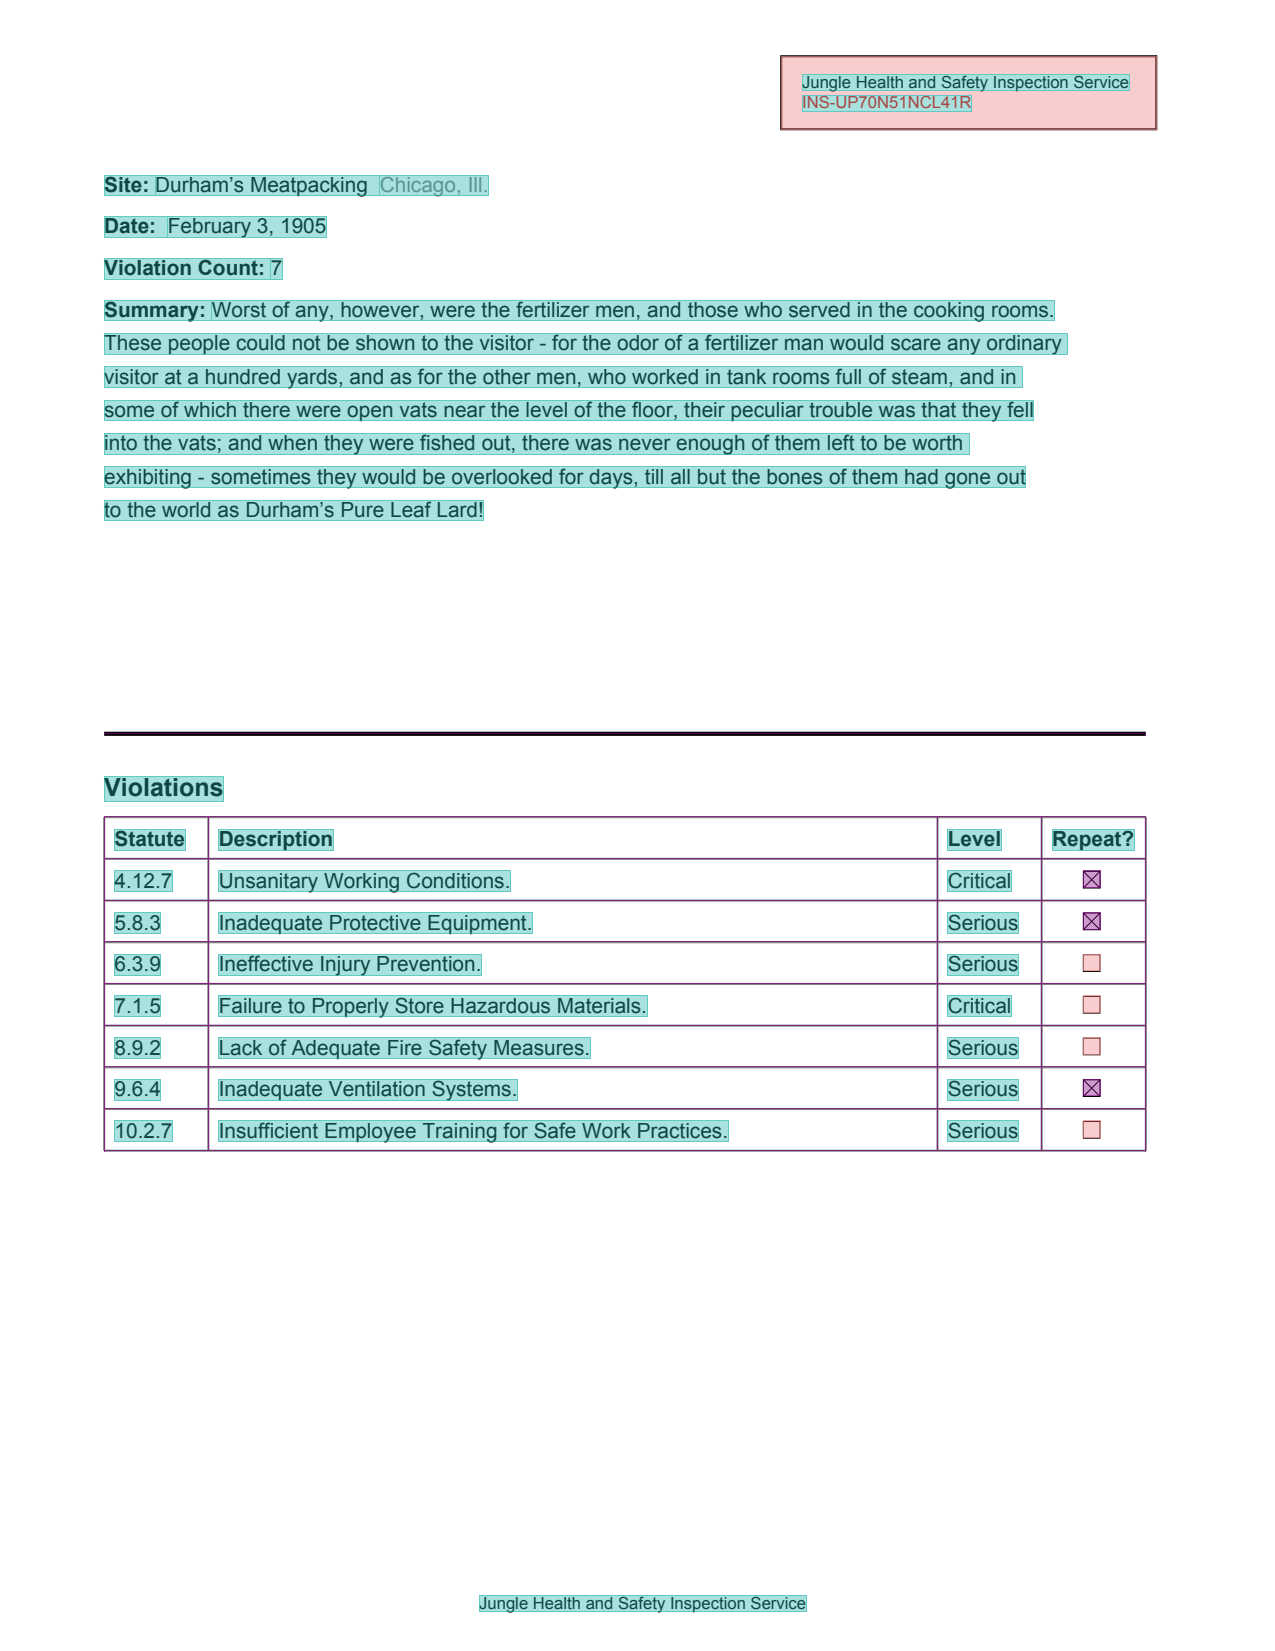

In [1]:
from natural_pdf import PDF

pdf = PDF("https://github.com/jsoma/natural-pdf/raw/refs/heads/main/pdfs/01-practice.pdf")
page = pdf.pages[0]

# View a few elements that contain the word "Summary"
page.find_all('text:contains("Summary")').show()

# Crop-only display of the region below the heading
heading = page.find('text:bold[size>=12]')
region_below = heading.below(height=250)
region_below.show(crop=True)

# Colour by element type
page.find_all('text, rect, line').show(group_by='type')

## Visualizing Quantitative Data

Natural PDF automatically detects when you're working with quantitative data (like confidence scores, sizes, or coordinates) and uses gradient colors instead of categorical colors:

Rendering pages:   0%|          | 0/1 [00:00<?, ?it/s]

Using CPU. Note: This module is much faster with a GPU.


/Users/soma/Development/natural-pdf/.nox/docs/lib/python3.10/site-packages/torch/utils/data/dataloader.py:683: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)


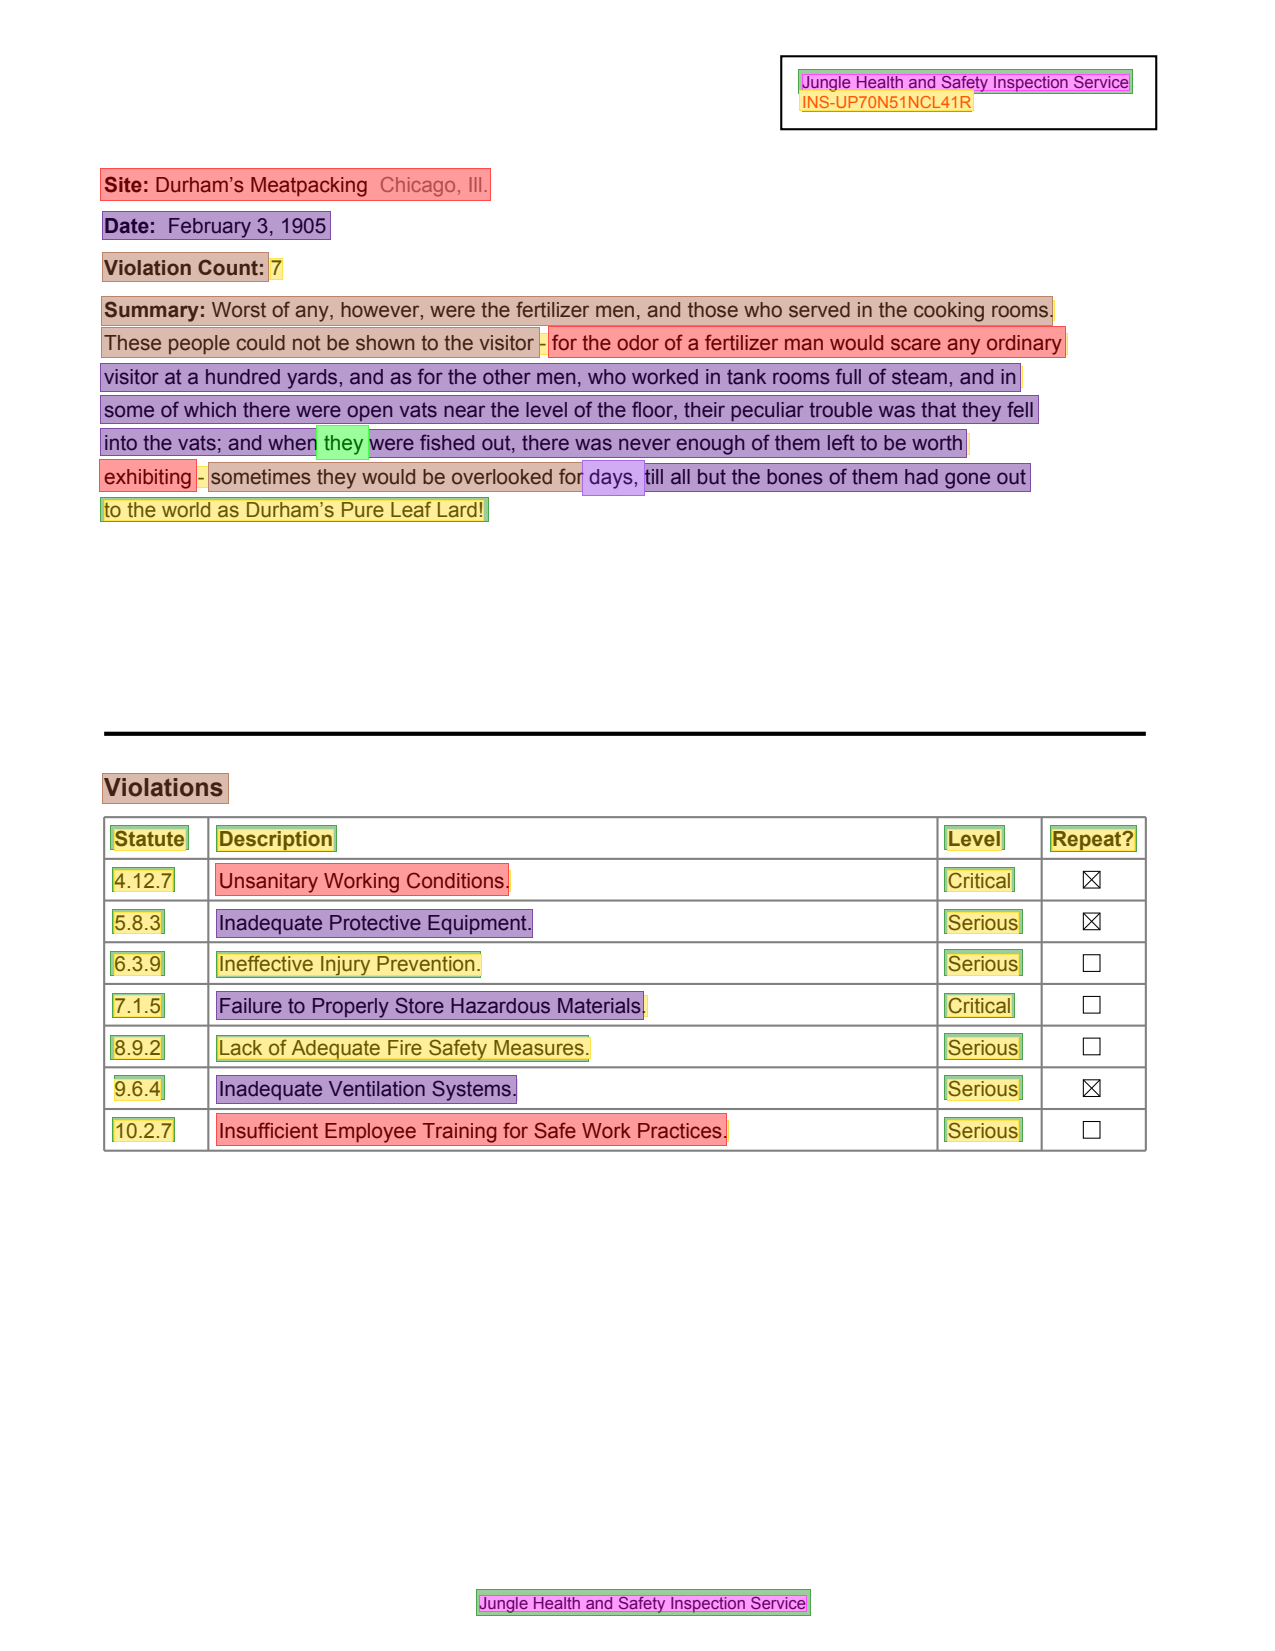

In [2]:
# After applying OCR, visualize confidence scores with gradient colors
page.apply_ocr()
page.find_all('text[source=ocr]').show(group_by='confidence')

# Visualize font sizes with gradient colors
page.find_all('text').show(group_by='size')

# Use different colormaps for better visualization
page.find_all('text').show(group_by='size', color='plasma')    # Purple to yellow
page.find_all('text').show(group_by='size', color='viridis')   # Blue to yellow
page.find_all('text').show(group_by='size', color='coolwarm')  # Blue to red

# Focus on specific ranges
page.find_all('text').show(group_by='size', bins=[8, 14])      # Only sizes 8-14
page.find_all('text').show(group_by='size', bins=[8, 12, 16])  # Small/medium/large

This makes it easy to spot patterns in your data - like identifying all the large headings or low-confidence OCR results.

**Note:** When using quantitative data, you'll automatically get a color scale/bar instead of a discrete legend, showing the continuous mapping from values to colors.

**Tip – `crop=True`**  

Pass `crop=True` to `.show()` (or `.render()`) when you want the *smallest* image that still contains all of the selected elements/region.  
This works for both `Region` objects and regular `ElementCollection`s – perfect for quickly zooming into the exact area you're debugging.

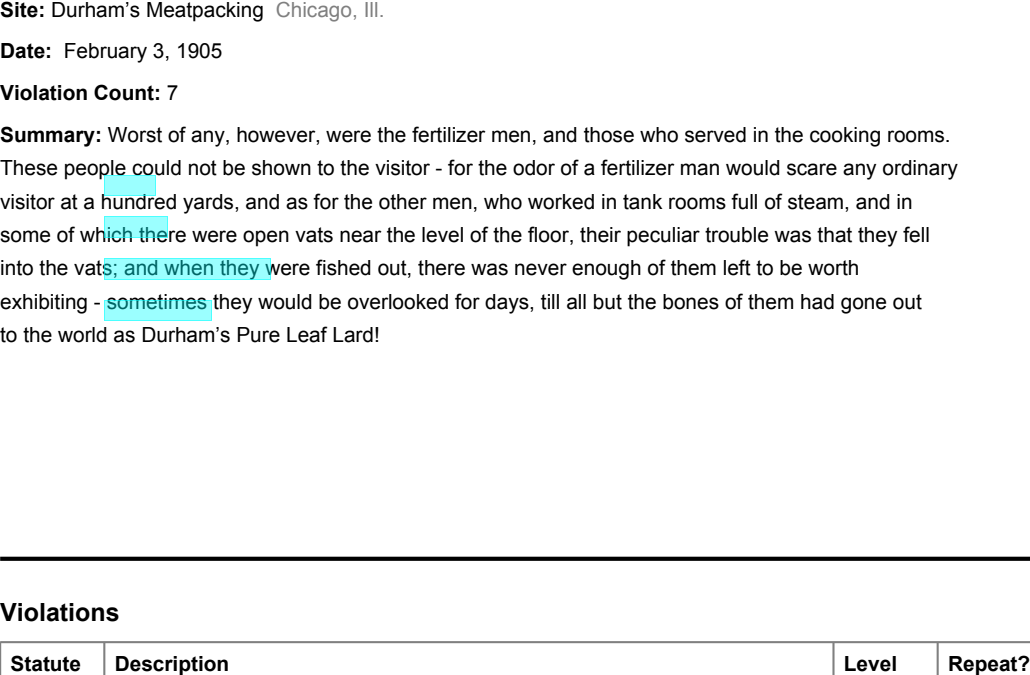

In [3]:
# Zoom into just the bold text you found
page.find_all('text:bold').show(crop=True)

## Adding Multiple Highlights

Use the context manager pattern with `page.highlights()` to show multiple groups of elements together in a single image. This is perfect when you want to visualize different types of elements with different colors and labels.

In [4]:
from natural_pdf import PDF

pdf = PDF("https://github.com/jsoma/natural-pdf/raw/refs/heads/main/pdfs/01-practice.pdf")
page = pdf.pages[0]

# Find different types of elements
summary_elements = page.find_all('text:contains("Summary")')
date_elements = page.find_all('text:contains("Date")')
line_elements = page.find_all('line')

with page.highlights() as h:
    h.add(summary_elements, label='Summary')
    h.add(date_elements, label='Date')
    h.add(line_elements, label='Lines')
    h.show()

## Customizing Multiple Highlights

Customize the appearance of multiple highlights using the context manager:

In [5]:
title = page.find('text:bold[size>=12]')
text = page.find('text:contains("Critical")')
rect = page.find('rect')

with page.highlights() as h:
    h.add(title, color="red", label="Title")           # Color name
    # h.add(title, color="#FF0000", label="Title")        # Hex color
    
    # Add a label to the highlight (appears in legend)
    h.add(text, label="Critical")
    
    # Combine color and label
    h.add(rect, color=(0, 0, 1), label="Box")
    
    h.show()

## Highlighting Multiple Collections

Adding an `ElementCollection` to the context manager applies the highlight to all elements within it. This is great for comparing different types of elements on the same page.

In [6]:
# Find different types of elements
headings = page.find_all('text[size>=14]:bold')
tables = page.find_all('region[type=table]')

with page.highlights() as h:
    h.add(headings, color=(0, 0.5, 0, 0.3), label="Headings")
    h.add(tables, color=(0, 0, 1, 0.2), label="Tables")
    h.show()

## Viewing Regions

You can visualise regions to see the exact area you're working with:

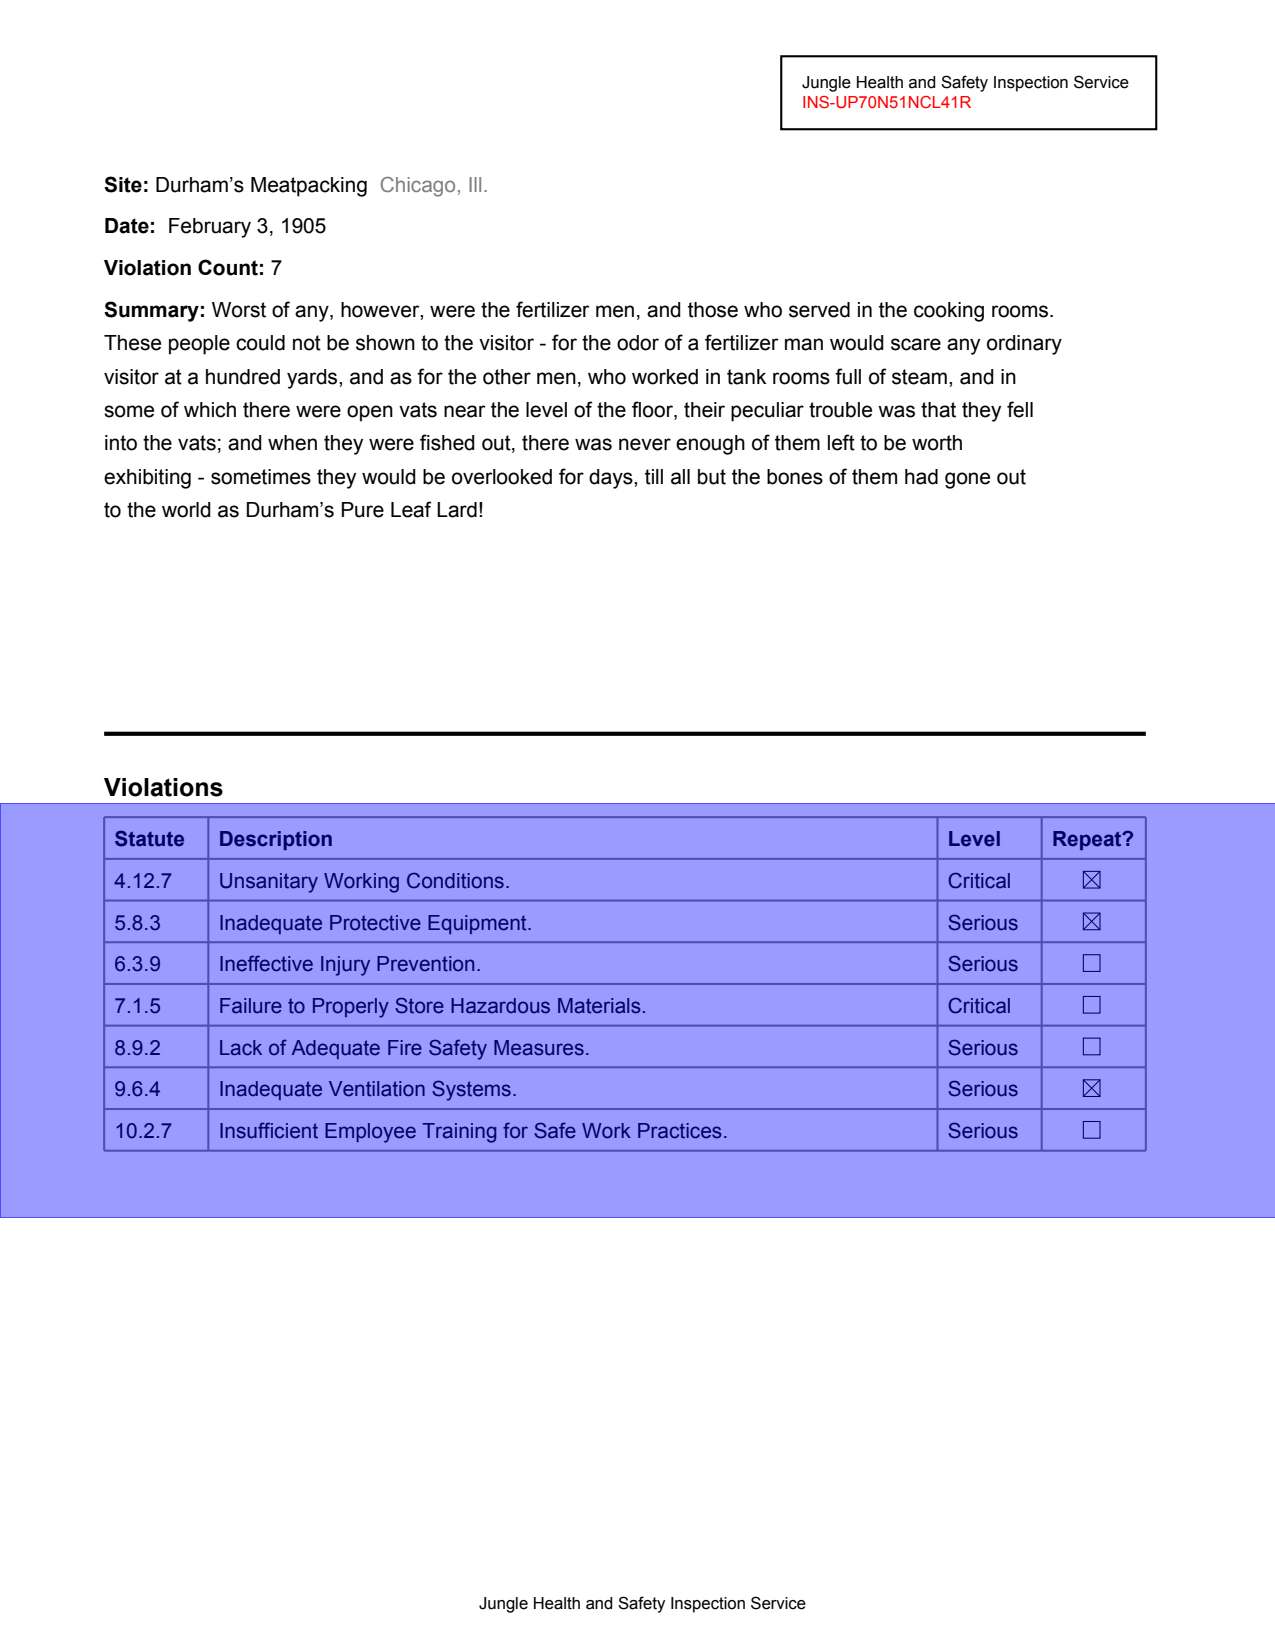

In [7]:
# Find a title and create a region below it
title = page.find('text:contains("Violations")')
content = title.below(height=200)

# Highlight the region
content.show()

Or look at just the region by itself

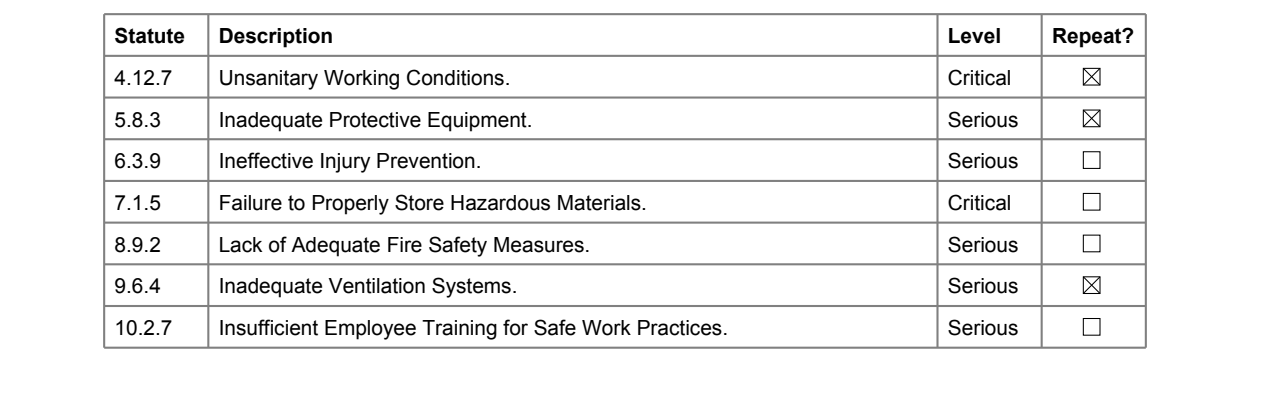

In [8]:
# Find a title and create a region below it
title = page.find('text:contains("Violations")')
content = title.below(height=200)

# Crop to the region
content.show(crop=True)

## Working with Text Styles

Visualize text styles to understand the document structure:

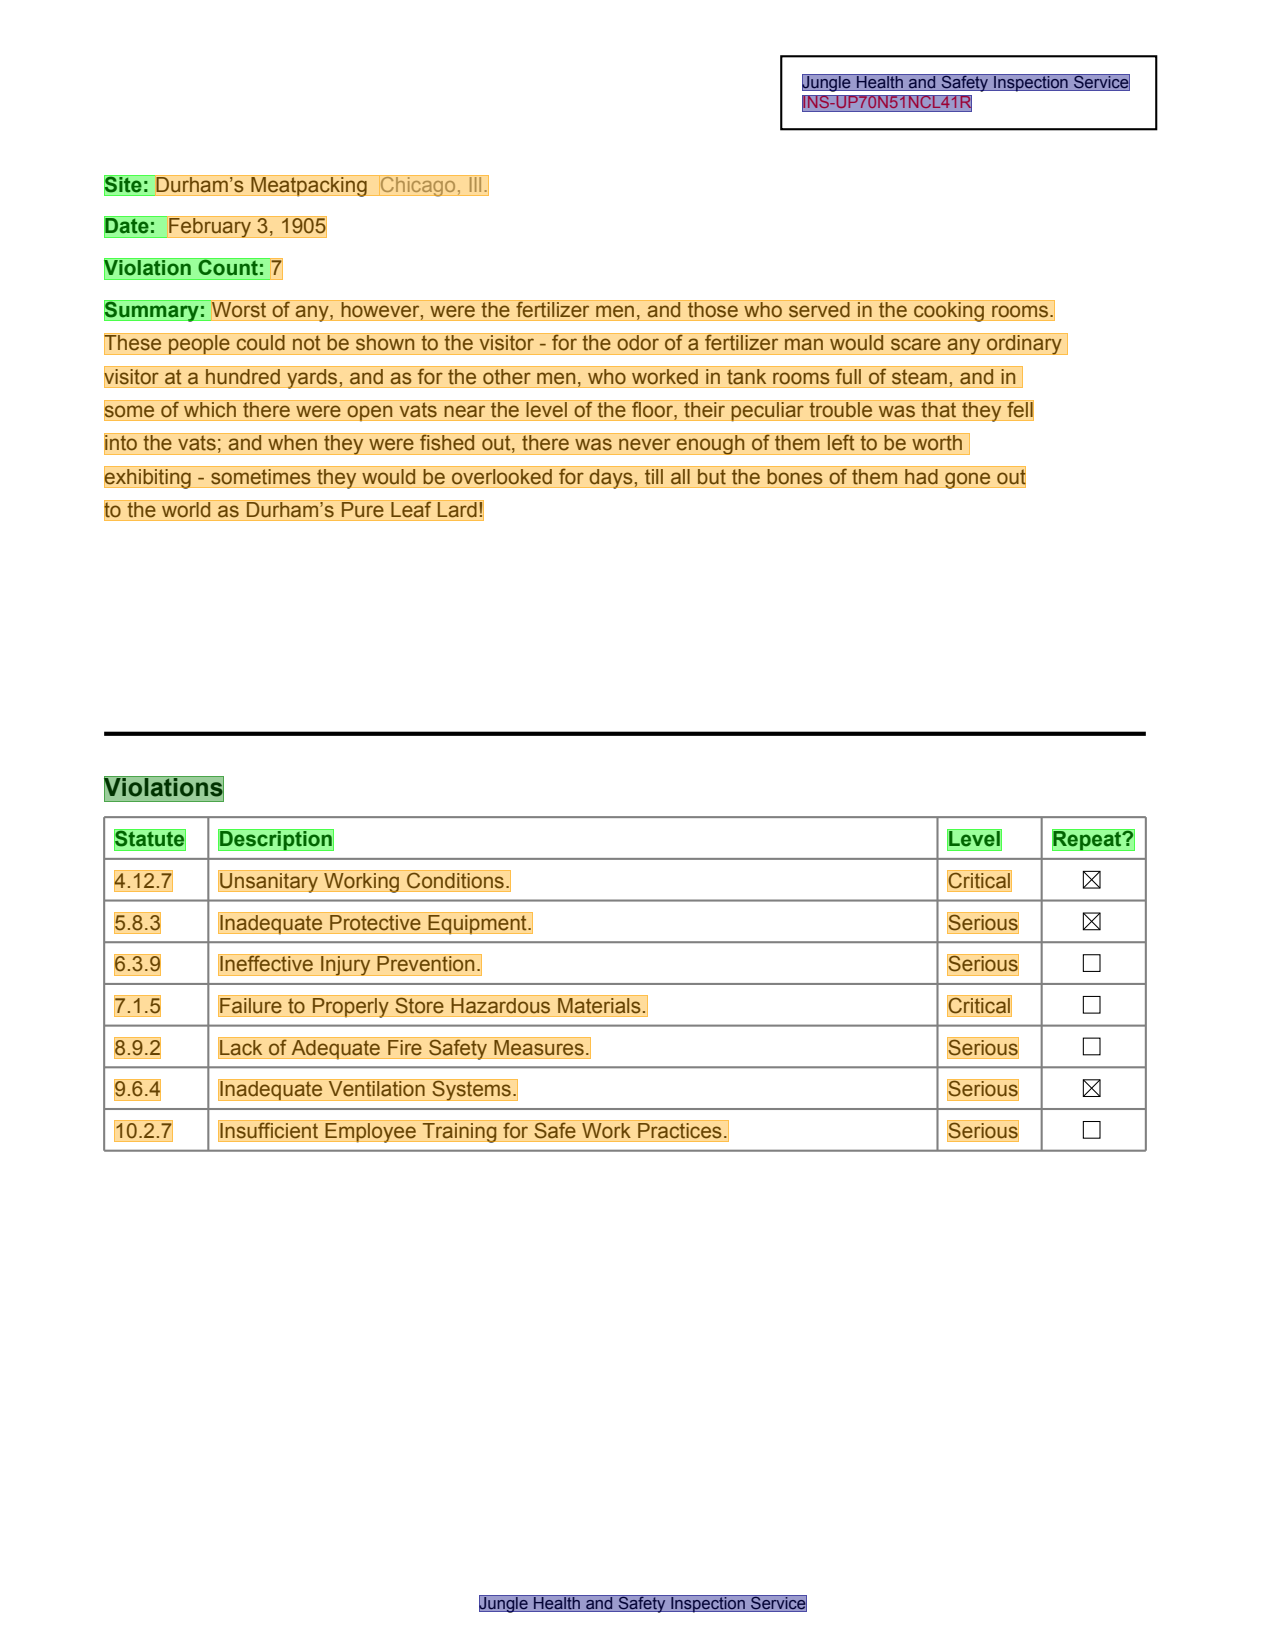

In [9]:
# Analyze and visualize text styles
page.clear_highlights()

page.analyze_text_styles()
page.find_all('text').show(group_by='style_label')

## Displaying Attributes

You can display element attributes directly on the highlights:

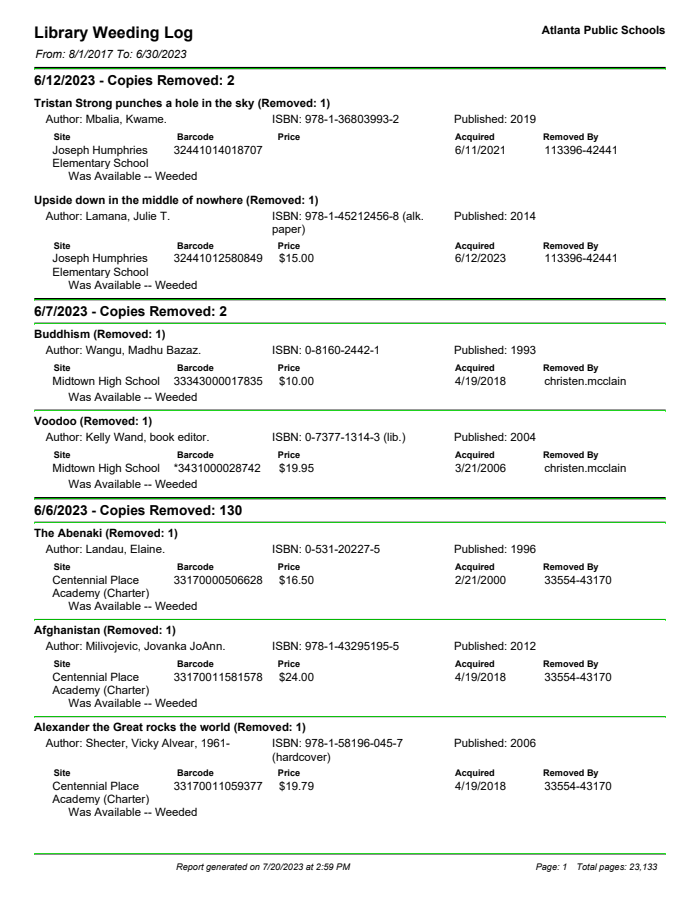

In [10]:
pdf = PDF("https://github.com/jsoma/natural-pdf/raw/refs/heads/main/pdfs/Atlanta_Public_Schools_GA_sample.pdf")
page = pdf.pages[0]

lines = page.find_all('line')
lines.show(annotate=['width', 'color'], width=700)

Does it get busy? YES.


## Document QA Visualization

Visualize document QA results:

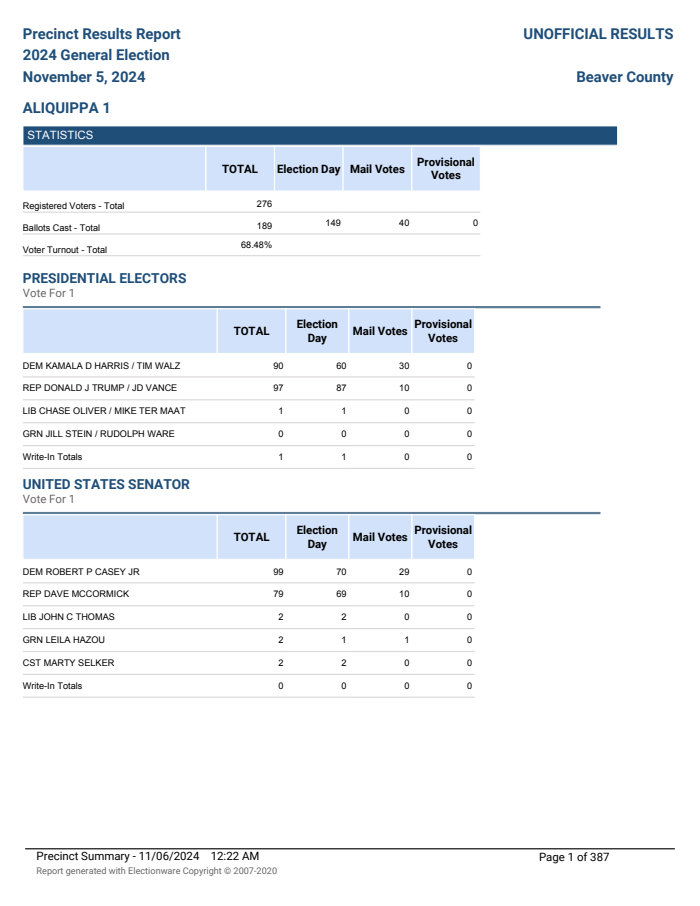

In [11]:
pdf = PDF("https://github.com/jsoma/natural-pdf/raw/refs/heads/main/pdfs/0500000US42007.pdf")
page = pdf.pages[0]
page.show(width=700)

In [12]:
response = page.ask("How many votes did Kamala Harris get on Election Day?")
response

Device set to use mps


{'question': 'How many votes did Kamala Harris get on Election Day?',
 'answer': '60',
 'confidence': 0.31857365369796753,
 'start': 31,
 'end': 31,
 'found': True,
 'page_num': 0,
 'source_elements': <ElementCollection[TextElement](count=1)>}

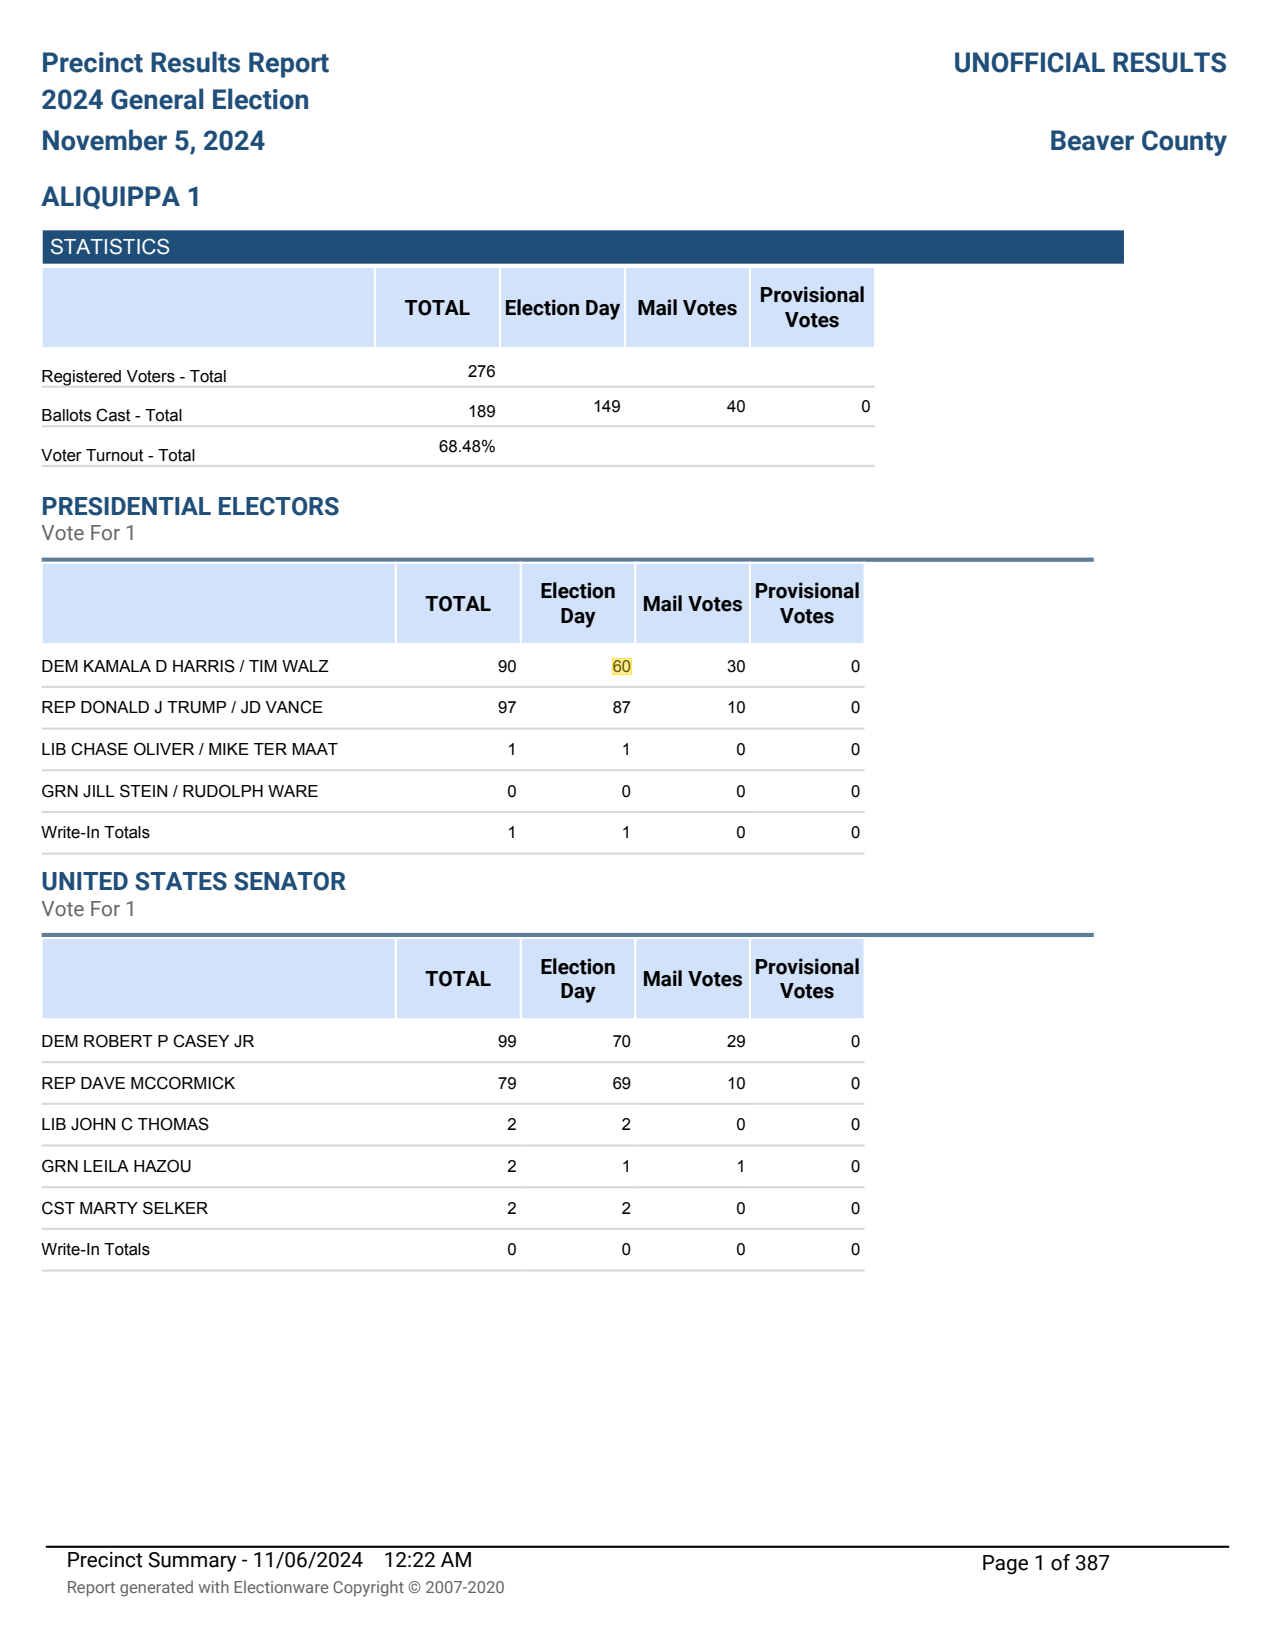

In [13]:
response['source_elements'].show()

## Next Steps

Now that you know how to visualize PDF content, you might want to explore:

- [OCR capabilities](../ocr/index.md) for working with scanned documents
- [Layout analysis](../layout-analysis/index.ipynb) for automatic structure detection
- [Document QA](../document-qa/index.ipynb) for asking questions directly to your documents